# **Model Building**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## **Loading the cleaned dataset**

In [2]:
data = pd.read_csv('data/cleaned_sensor.csv')

In [3]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


## **Independent and Dependent Splits**

In [4]:
X = data.drop(columns= 'machine_status')
y = data['machine_status']

In [5]:
X

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,193.8657,231.1921
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,193.8657,231.1921
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,193.8657,232.0602
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,193.8657,234.0856


In [6]:
y

0         NORMAL
1         NORMAL
2         NORMAL
3         NORMAL
4         NORMAL
           ...  
220315    NORMAL
220316    NORMAL
220317    NORMAL
220318    NORMAL
220319    NORMAL
Name: machine_status, Length: 220320, dtype: object

## **Corelation between the sensors**

In [7]:
X.corr()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
sensor_00,1.000000,0.218911,0.388757,0.249116,0.471534,0.590900,0.496648,0.356720,0.391511,0.317968,...,-0.088314,-0.034834,0.062205,0.045712,0.041780,0.054052,0.254824,0.143636,0.467080,0.238161
sensor_01,0.218911,1.000000,0.736858,0.692553,0.676752,0.162169,0.415007,0.383339,0.364416,0.379771,...,0.089431,0.184399,0.318047,0.284981,0.233206,0.272377,0.344140,0.373451,0.552803,-0.155991
sensor_02,0.388757,0.736858,1.000000,0.822339,0.820339,0.261236,0.525042,0.472580,0.428470,0.468841,...,0.025049,0.138273,0.244888,0.225255,0.201395,0.255327,0.376548,0.339650,0.733542,-0.081317
sensor_03,0.249116,0.692553,0.822339,1.000000,0.682470,0.145981,0.460133,0.396366,0.363705,0.393029,...,0.043680,0.172227,0.307351,0.246025,0.227914,0.273110,0.459636,0.374163,0.586432,-0.147086
sensor_04,0.471534,0.676752,0.820339,0.682470,1.000000,0.386227,0.632705,0.526894,0.473815,0.482672,...,0.000034,0.136457,0.220225,0.162906,0.168658,0.229235,0.394885,0.295378,0.763203,-0.073961
sensor_05,0.590900,0.162169,0.261236,0.145981,0.386227,1.000000,0.574608,0.514056,0.443526,0.493869,...,-0.154081,-0.148698,-0.005591,-0.016750,-0.081387,-0.006862,0.043207,0.021892,0.359563,0.324457
sensor_06,0.496648,0.415007,0.525042,0.460133,0.632705,0.574608,1.000000,0.832299,0.706965,0.742507,...,-0.108963,0.018297,0.232687,0.165753,0.176775,0.192002,0.425021,0.292645,0.513717,0.256577
sensor_07,0.356720,0.383339,0.472580,0.396366,0.526894,0.514056,0.832299,1.000000,0.804997,0.853338,...,-0.041053,0.031961,0.171953,0.136523,0.133704,0.155141,0.288896,0.204815,0.443324,0.217094
sensor_08,0.391511,0.364416,0.428470,0.363705,0.473815,0.443526,0.706965,0.804997,1.000000,0.747792,...,-0.026959,0.034935,0.170121,0.135521,0.131477,0.159310,0.263467,0.189721,0.397668,0.185446
sensor_09,0.317968,0.379771,0.468841,0.393029,0.482672,0.493869,0.742507,0.853338,0.747792,1.000000,...,-0.012893,0.036722,0.142711,0.119204,0.117795,0.148970,0.232169,0.174078,0.413285,0.193827


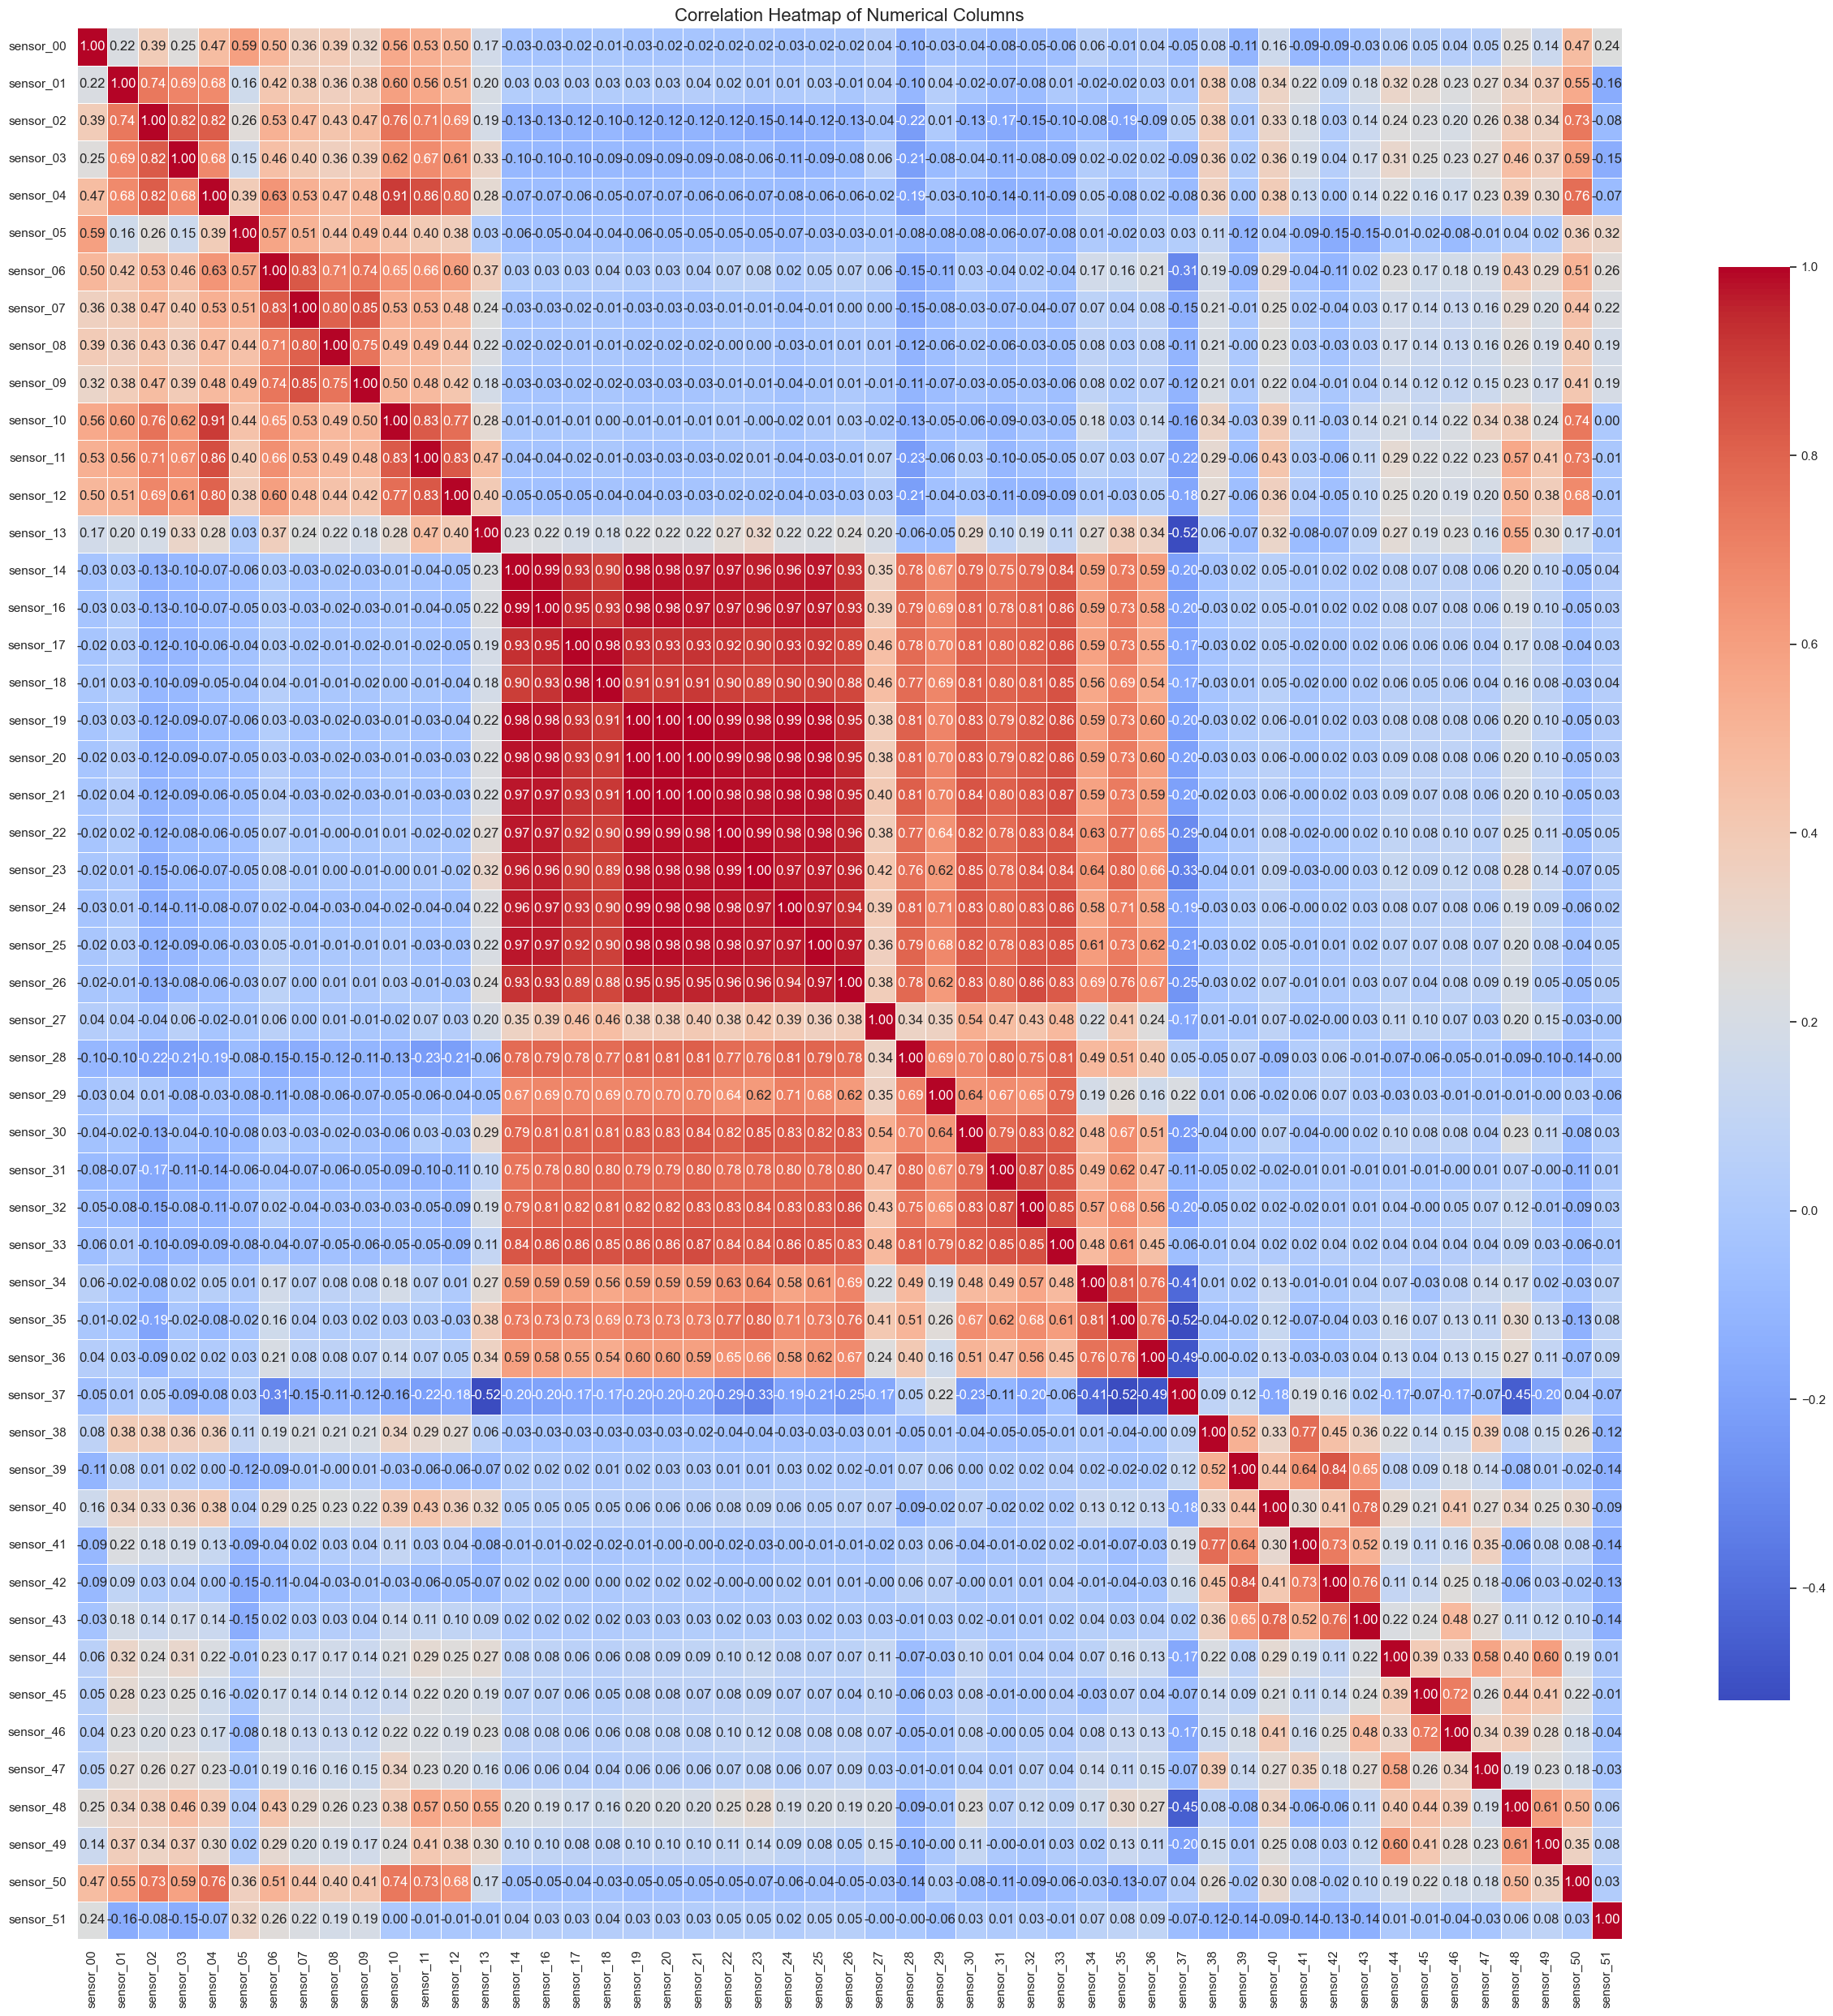

In [8]:
# Set the figure size and style
sns.set(style="whitegrid")

# Calculate the correlation matrix for the numerical columns
corr_matrix = X.corr()

# Set up the matplotlib figure with appropriate size
plt.figure(figsize=(25, 25))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.75})

# Set the title and display the plot
plt.title("Correlation Heatmap of Numerical Columns", fontsize=16)
plt.tight_layout()
plt.show()

### **Correlation Heatmap Analysis – Sensor Relationships**

The correlation heatmap of numerical sensor data reveals several key insights:

1. **Strong Inter-Sensor Correlations:**  
   A notable cluster of sensors (`sensor_17` to `sensor_34`) exhibits very high positive correlations (r > 0.8), indicating that these sensors may be measuring similar physical processes or are influenced by the same operational conditions.

2. **Weak or No Correlation:**  
   Many sensors, particularly those in the `sensor_40+` range, show very low or near-zero correlations with others, suggesting they may capture unique or noise-heavy signals not shared with the rest of the system.

3. **Redundancy Potential:**  
   The dense high-correlation blocks (e.g., among `sensor_20` to `sensor_30`) suggest potential redundancy. Feature selection or dimensionality reduction techniques (like PCA) could be applied to reduce multicollinearity without significant information loss.

---

## **Encoding the target variable**

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Initialize and fit encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [11]:
y_encoded

array([1, 1, 1, ..., 1, 1, 1], shape=(220320,))

## **Train Test Split**

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_encoded, 
    test_size= 0.3,
    random_state= 42)

In [14]:
X_train

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
167988,2.499826,48.263890,51.475690,46.831596,607.407410,71.635920,13.71528,16.60880,16.19647,15.50926,...,38.802082,44.010410,44.849540,43.402780,49.189816,50.92593,206.01850,58.449070,193.865700,185.7639
2788,2.374884,48.177080,51.736110,42.795135,635.995400,80.348540,13.41146,16.07350,15.69734,15.11863,...,31.250000,40.885410,42.534720,110.532400,82.754630,39.64120,236.40050,69.733800,279.513900,212.3843
71794,2.497859,46.310760,50.564240,42.534721,634.375000,77.048760,13.59230,15.62500,15.14757,15.08247,...,32.291660,36.197910,35.300926,42.534720,51.215280,39.64120,106.77080,46.296300,178.240700,205.7292
192675,2.455556,50.303820,52.951390,45.008678,631.481400,73.662290,14.53270,16.12413,15.69734,15.11863,...,34.895830,50.520830,43.692130,39.062500,48.321760,41.95602,203.70370,64.814810,193.865700,177.0833
177154,2.453588,46.267361,50.564240,44.314236,627.430542,64.930290,14.50376,16.70284,15.41522,15.11863,...,32.552082,43.489580,41.956020,79.861110,78.125000,49.47917,315.68290,62.500000,193.865700,272.2801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,2.510648,47.482640,49.913190,41.927080,640.162000,78.353750,14.17101,15.85648,15.14757,14.85822,...,34.375000,41.927080,36.458330,35.011570,40.798611,40.21991,62.78935,45.428242,156.828700,197.3380
103694,2.459491,48.046880,50.086803,40.364582,628.240700,73.568560,14.03356,15.62500,15.33565,15.11863,...,38.802080,44.270830,43.113430,37.615742,41.666668,78.12500,95.48611,52.372680,190.682900,197.9167
131932,2.456539,35.026039,37.369789,34.895832,3.336227,99.999878,13.64294,16.16753,15.49479,15.08247,...,28.385416,30.468748,31.539352,31.828703,32.118057,32.98611,31.82870,31.828703,32.407406,1000.0000
146867,2.503762,42.968750,49.522570,44.314236,636.689800,79.808570,14.06250,16.16030,15.56713,15.05353,...,34.375000,41.406250,48.900460,41.956017,40.219910,77.83565,144.96530,82.465280,193.865700,268.2292


## **Scaling**

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 3.06791206e-01,  2.06791035e-01,  1.66446191e-01, ...,
         7.10209456e-02,  1.33803818e-01, -1.55735998e-01],
       [-2.08681506e-03,  1.80416244e-01,  2.37393360e-01, ...,
         6.62191787e-01,  1.75008284e+00,  9.69028596e-02],
       [ 3.01928445e-01, -3.86612895e-01, -8.18634556e-02, ...,
        -5.65623730e-01, -1.61057717e-01,  3.37431453e-02],
       ...,
       [ 1.99778329e-01, -3.81515975e+00, -3.67647581e+00, ...,
        -1.32353478e+00, -2.91309797e+00,  7.57170904e+00],
       [ 3.16521672e-01, -1.40198917e+00, -3.65649411e-01, ...,
         1.32915323e+00,  1.33803818e-01,  6.26894585e-01],
       [-8.75215677e-01,  7.07884716e-01,  6.51246511e-01, ...,
        -4.74674491e-01, -9.03670975e-01, -4.58928925e-02]],
      shape=(154224, 51))

In [18]:
X_test_scaled

array([[ 0.30679121, -0.14925178, -0.37747576, ..., -0.38372525,
        -0.02454768, -0.12003682],
       [ 0.31652167, -0.28111808, -0.08186346, ..., -0.38372525,
         0.13380382, -0.17770443],
       [ 0.33354504, -0.13606605,  0.32016415, ..., -0.30793413,
         0.13380382,  0.00628166],
       ...,
       [ 0.19734818, -0.47892011, -0.03456625, ..., -0.86878821,
        -0.54328507, -0.30677039],
       [ 0.20707618, -0.74265282,  0.04820182, ..., -0.76268085,
        -0.21566136, -0.29853175],
       [ 0.32868228, -0.8745207 ,  0.11914899, ..., -0.61109861,
         0.13380382, -0.20241939]], shape=(66096, 51))

In [19]:
X_train_scaled = pd.DataFrame(
    data= X_train_scaled,
    columns= X_train.columns
)

In [20]:
X_test_scaled = pd.DataFrame(
    data= X_test_scaled,
    columns= X_test.columns
)

In [21]:
X_train_scaled

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,0.306791,0.206791,0.166446,1.273713,0.116824,-0.099153,0.100471,0.348214,0.489748,0.340123,...,0.337593,0.012494,0.190797,0.025624,0.075180,0.639992,0.671439,0.071021,0.133804,-0.155736
1,-0.002087,0.180416,0.237393,-0.395653,0.315113,0.402351,-0.040617,0.104142,0.243728,0.152604,...,-0.417375,-0.273488,-0.007733,5.268551,2.211848,-0.450041,1.040735,0.662192,1.750083,0.096903
2,0.301928,-0.386613,-0.081863,-0.503353,0.303874,0.212414,0.043362,-0.100354,-0.027253,0.135245,...,-0.313242,-0.702463,-0.628139,-0.042172,0.204117,-0.450041,-0.534926,-0.565624,-0.161058,0.033743
3,0.197348,0.826567,0.568477,0.519805,0.283803,0.017486,0.480063,0.127227,0.243728,0.152604,...,-0.052908,0.608292,0.091532,-0.313358,0.019922,-0.226444,0.643302,0.404502,0.133804,-0.238119
4,0.192483,-0.399799,-0.081863,0.232603,0.255706,-0.485134,0.466624,0.391092,0.104672,0.152604,...,-0.287208,-0.035169,-0.057365,2.873076,1.917135,0.500244,2.004419,0.283236,0.133804,0.665339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154219,0.333545,-0.030570,-0.259231,-0.754657,0.344013,0.287530,0.312102,0.005190,-0.027253,0.027596,...,-0.104974,-0.178161,-0.528874,-0.629742,-0.458987,-0.394141,-1.069524,-0.611099,-0.565127,-0.045893
154220,0.207076,0.140859,-0.211933,-1.400861,0.261326,0.012091,0.248273,-0.100354,0.065452,0.152604,...,0.337593,0.036327,0.041900,-0.426352,-0.403728,3.267249,-0.672092,-0.247302,0.073741,-0.040401
154221,0.199778,-3.815160,-3.676476,-3.662582,-4.073066,1.533496,0.066878,0.147015,0.143891,0.135245,...,-0.703743,-1.226764,-0.950750,-0.878329,-1.011573,-1.092880,-1.445854,-1.323535,-2.913098,7.571709
154222,0.316522,-1.401989,-0.365649,0.232603,0.319929,0.371270,0.261712,0.143719,0.179548,0.121353,...,-0.104974,-0.225824,0.538224,-0.087370,-0.495826,3.239299,-0.070668,1.329153,0.133804,0.626895


In [22]:
X_test_scaled

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
0,0.306791,-0.149252,-0.377476,-1.023909,0.304676,0.132524,-0.114522,-0.100354,0.011967,0.010233,...,-0.131008,-0.535639,-0.652955,-0.539347,-0.366889,-0.366192,-0.847947,-0.383725,-0.024548,-0.120037
1,0.316522,-0.281118,-0.081863,-0.305902,0.283804,-0.395306,0.278509,0.285543,0.204508,0.121353,...,-0.365309,-0.678630,-0.628138,0.342007,0.259376,-0.030797,0.477999,-0.383725,0.133804,-0.177704
2,0.333545,-0.136066,0.320164,1.632715,0.319929,-0.088581,0.547245,0.147015,0.122500,0.326231,...,0.155359,-0.201993,0.240430,-0.268161,0.185698,0.612042,0.414690,-0.307934,0.133804,0.006282
3,0.070877,0.061736,0.450232,0.681357,0.283001,0.551487,0.701771,0.265755,0.364956,0.121353,...,-0.183075,0.179318,0.463776,1.042571,1.309290,-0.114645,3.351467,0.343869,0.133804,-0.062369
4,0.061149,0.721073,0.355638,0.322354,0.273367,-0.426704,0.752156,0.414177,0.511140,0.402629,...,0.077259,0.894275,1.903117,-0.222963,0.204117,1.478478,0.509652,1.056305,0.133804,0.769690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66091,0.187618,0.510084,0.379285,0.304405,0.327154,-1.187774,0.466624,0.351511,0.222331,0.121353,...,-0.183075,0.608292,0.736755,1.178164,1.677681,1.031285,1.322102,0.677350,0.133804,0.333064
66092,0.136545,-0.333863,0.284691,-0.485403,0.238045,0.412424,-0.114522,0.391092,-0.116393,0.100519,...,-0.495475,-0.440311,-0.677771,-0.855730,-0.551085,-0.086696,0.425242,-0.247301,0.925563,0.124363
66093,0.197348,-0.478920,-0.034566,-0.772606,0.334379,0.340393,0.087032,-0.064074,0.011967,0.121353,...,-0.703743,1.680728,-0.950750,-0.448951,0.701445,-0.925183,-1.248896,-0.868788,-0.543285,-0.306770
66094,0.207076,-0.742653,0.048202,-0.162298,0.234834,0.561722,-0.208578,0.265755,-0.009424,0.010233,...,-0.521509,0.083990,-0.901117,-0.833131,-0.845797,-0.785435,-1.160969,-0.762681,-0.215661,-0.298532


## **PCA**

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA without limiting number of components
pca = PCA()
pca.fit(X_train_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

### **Minimum PCA Components for consideration** 

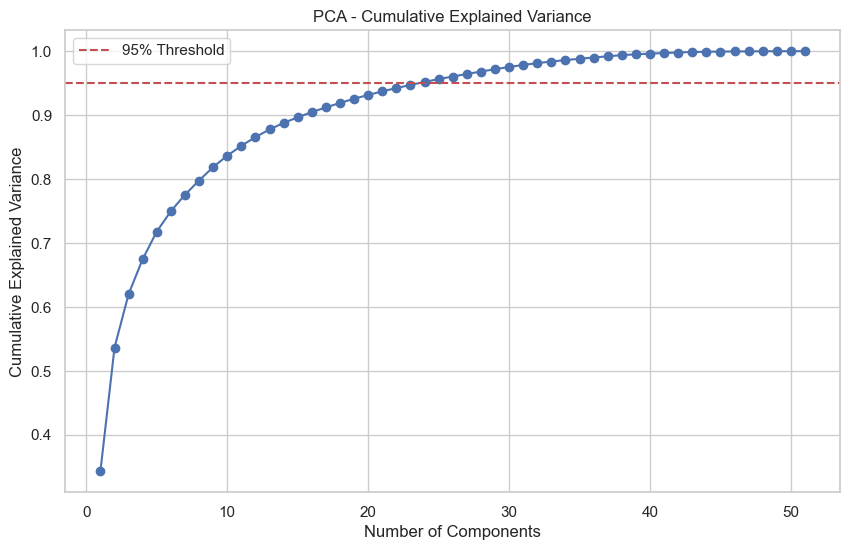

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

In [34]:
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Number of components to retain 95% variance: {n_components_95}')

Number of components to retain 95% variance: 24


# 📉 Dimensionality Reduction & Feature Engineering Summary

---

## 1. 🔬 Correlation Heatmap Analysis – Sensor Relationships

The correlation heatmap of numerical sensor data reveals several valuable insights:

### 🔗 Strong Inter-Sensor Correlations
- A clear cluster of sensors (`sensor_17` to `sensor_34`) demonstrates **very high positive correlations** (r > 0.8).
- Indicates that these sensors likely measure **related physical processes** or are influenced by **shared operating conditions**.

### 🧍 Weak or No Correlation
- Sensors in the `sensor_40+` range show **minimal or no correlation** with other sensors.
- Suggests these may represent **unique behaviors** or **noisy/isolated signals**.

### ♻️ Redundancy Potential
- Dense high-correlation blocks, especially among `sensor_20` to `sensor_30`, suggest **feature redundancy**.
- Supports the use of **dimensionality reduction techniques** like PCA to reduce multicollinearity.

---

## 2. 🧪 Principal Component Analysis (PCA)

![PCA Explained Variance Curve](./0594a299-da43-4c0b-9029-8cada297310c.png)

- The PCA cumulative explained variance plot shows a **sharp rise in variance retention** within the first 25 components.
- **Threshold Line:** 95% cumulative variance
- **Optimal Dimensionality:**  
  ✅ **24 principal components** are sufficient to retain **95% of the total variance**, drastically reducing the feature space from the original 52 sensors.

---

## 3. 🧠 Feature Engineering Strategy

### 📌 Selected Feature Types & Justifications:

| Feature Category            | Feature Name / Description                       | Justification                                                                 |
|----------------------------|--------------------------------------------------|------------------------------------------------------------------------------|
| **Original Sensors**       | `sensor_00`, `sensor_01`, `sensor_04`            | High variation across machine status categories                             |
| **Statistical Aggregates** | Rolling Mean, Median, Std (window=10/30)         | Captures temporal dynamics & smoothing anomalies                            |
| **Lag Features**           | Sensor lag at t-1, t-3, t-5                      | Useful for capturing temporal dependencies                                  |
| **PCA Components**         | `PC1` to `PC24`                                  | Represent compressed versions of original features, retain 95% variance     |
| **Interaction Terms**      | Sensor1 × Sensor2                                | Captures nonlinear dependencies and synergies among correlated features     |
| **Categorical Encoding**   | `machine_status` (label encoded or one-hot)      | For use in supervised learning setups                                       |

---

## ✅ Summary

- **Correlation Analysis** identified redundancy and independence zones across sensors.
- **PCA** effectively reduced dimensionality to **24 components** with minimal variance loss.
- **Feature Engineering** combines raw sensor data, temporal patterns, and PCA-transformed features to build a robust predictive model foundation.



In [35]:
pca = PCA(n_components= 24)

In [36]:
pca_X_train = pca.fit_transform(X_train_scaled)
pca_X_test = pca.transform(X_test_scaled)

In [37]:
pca_X_train

array([[ 2.19996941,  1.51241206,  0.12977958, ..., -0.27731197,
        -0.16749676,  0.4746025 ],
       [ 0.98159285,  1.62252759,  0.03676678, ..., -0.74320835,
         0.3266163 , -0.20021439],
       [ 1.02373655, -1.05404292, -1.28353539, ...,  0.3128437 ,
         0.3878779 , -0.01248505],
       ...,
       [ 2.17472362, -8.57979869, -4.44966672, ..., -0.42388251,
        -0.01437296,  0.05160696],
       [ 2.22302383,  1.29179432, -0.03260288, ...,  0.10869487,
        -0.501266  ,  1.24273526],
       [ 0.83011168, -0.57663918,  0.90730081, ..., -0.52654699,
        -0.44945556,  0.46741615]], shape=(154224, 24))

In [38]:
pca_X_test

array([[ 1.55620887e+00, -1.04463242e+00, -8.72490649e-01, ...,
         1.77103990e-01,  2.54292540e-01,  7.47480171e-02],
       [ 1.53738074e+00,  8.22730010e-01, -9.68669015e-01, ...,
         8.91346891e-05,  2.81303703e-02, -2.04822958e-01],
       [ 2.13107654e+00,  1.83949016e+00,  6.42908968e-01, ...,
        -2.92365980e-01,  1.76989189e-01,  3.15004153e-01],
       ...,
       [-3.64858260e+00, -5.09659378e-01, -4.59491918e-01, ...,
         3.59464342e-01,  4.03947332e-01, -3.11125901e-01],
       [-1.25170473e+01, -8.99570755e-01, -1.34090706e+00, ...,
        -6.55621249e-02, -2.03940447e-01,  1.10116080e-01],
       [ 2.19619520e+00,  1.18735059e+00, -1.35180499e+00, ...,
         1.24447602e-01,  3.03715288e-03,  3.68968407e-02]],
      shape=(66096, 24))

In [39]:
pca_X_train = pd.DataFrame(pca_X_train, columns=[f'PC{i+1}' for i in range(24)])
pca_X_test = pd.DataFrame(pca_X_test, columns=[f'PC{i+1}' for i in range(24)])

In [40]:
pca_X_test

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,1.556209,-1.044632,-0.872491,1.196903,0.559539,-0.639908,0.299145,0.581266,-0.685593,0.083869,...,-0.224879,-0.134851,0.174842,-0.620840,-0.408098,0.007387,0.414775,0.177104,0.254293,0.074748
1,1.537381,0.822730,-0.968669,-0.753076,0.019121,-0.598193,-0.056058,-0.399791,0.329814,0.070884,...,-0.777529,-0.651004,-0.243933,-0.128117,-0.065401,-0.846812,-0.896470,0.000089,0.028130,-0.204823
2,2.131077,1.839490,0.642909,-0.106073,0.759009,-1.326708,1.294089,0.030938,0.373483,0.241982,...,1.312544,-0.050591,0.676073,0.020783,0.456945,0.037276,-0.614443,-0.292366,0.176989,0.315004
3,1.201086,2.203636,-0.341372,-2.642407,-0.179419,0.619342,-0.962001,-0.093642,-0.736582,-1.193915,...,-0.189415,-0.196812,-0.443637,1.506792,0.382262,0.172637,-0.073187,-0.538768,0.146233,-0.149534
4,1.707630,2.970274,0.754535,-1.938412,0.353092,0.120926,0.710936,-0.137325,1.465270,-0.096000,...,-0.147688,-0.152813,-0.014924,-0.510462,0.035203,0.233267,0.418114,0.227077,0.033917,-0.271459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66091,2.180070,2.589712,0.405695,-2.813408,-0.321357,0.193813,-0.458936,-0.003644,-1.123464,-0.157877,...,0.632152,0.165727,-0.337042,-0.037283,-0.611430,-0.356481,0.455560,0.578632,-0.204892,-0.097220
66092,-10.041698,-0.580431,-1.716253,-0.384529,-0.097918,0.171530,-0.617786,0.103728,-0.196680,-0.353924,...,-1.077051,-1.162309,-0.140225,0.451787,1.145082,-1.604855,0.045288,1.322829,1.136274,-0.534023
66093,-3.648583,-0.509659,-0.459492,-0.006848,0.660021,-0.404159,-2.611177,-0.039845,-1.028821,0.873983,...,-1.459071,0.054328,1.163658,-0.393647,-0.475946,-0.708417,-1.396234,0.359464,0.403947,-0.311126
66094,-12.517047,-0.899571,-1.340907,0.071520,0.419667,-0.651496,-1.095131,-0.121418,-0.071974,0.152706,...,-0.403727,0.224045,-0.121078,-0.074819,-0.176358,0.398946,-0.132950,-0.065562,-0.203940,0.110116


In [41]:
pca_X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,2.199969,1.512412,0.129780,-0.592882,0.589591,-0.838855,0.524838,-0.183300,-0.138419,0.104069,...,1.157409,-0.479061,-0.201103,-0.092043,0.511556,-0.029855,-0.279750,-0.277312,-0.167497,0.474603
1,0.981593,1.622528,0.036767,-0.815958,-2.406658,3.784851,-1.635662,0.645280,-2.466778,0.412716,...,-0.176398,0.855150,0.558819,-0.220963,0.296936,-0.000105,0.985354,-0.743208,0.326616,-0.200214
2,1.023737,-1.054043,-1.283535,1.118825,-0.703843,0.701377,-0.684459,-0.232595,-0.198570,0.342025,...,-0.266379,-0.350206,-0.944411,-0.405826,-0.165990,-0.117590,-0.100723,0.312844,0.387878,-0.012485
3,1.820727,1.821621,-0.041957,-0.947887,0.138175,-0.932483,-0.902636,-0.512589,0.313212,-0.180024,...,-0.778438,0.035619,-0.464724,0.844727,-0.583985,0.402583,0.283942,-0.308223,0.019749,-0.216928
4,2.502422,1.808317,-0.329268,-3.058522,0.256778,0.996263,-0.876814,0.405587,-1.534295,0.908018,...,-0.173748,-0.189941,0.040379,0.180161,-0.247532,-0.131211,-0.097082,-0.500418,0.098964,0.382547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154219,1.302573,-0.598848,-0.628290,1.006970,1.188559,-1.058140,0.306705,0.524309,-0.584035,0.123435,...,-0.688992,0.118234,-0.087108,-0.476726,-0.719587,0.146023,0.109535,-0.115117,-0.137590,0.040823
154220,1.456674,0.238215,1.393800,0.946573,1.367278,-0.400695,2.572945,1.600871,-0.663044,0.999293,...,-1.133653,-0.894465,0.446671,0.121538,0.021937,0.138618,0.815892,0.747237,0.276887,0.441378
154221,2.174724,-8.579799,-4.449667,-0.208228,6.287971,4.982815,-0.097709,2.686223,1.307092,-0.702685,...,0.818534,0.084188,0.766340,-0.467563,0.293355,-0.100579,-0.423230,-0.423883,-0.014373,0.051607
154222,2.223024,1.291794,-0.032603,-0.398246,0.851257,0.051678,2.275168,1.848690,0.510789,0.998254,...,-0.586271,-0.053203,0.619046,0.031767,-0.002380,0.834707,-0.456091,0.108695,-0.501266,1.242735


## **Model Training**

## **Base Models**

In [42]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Evalution metric
from sklearn.metrics import accuracy_score

In [44]:
# Define and train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(
        kernel='rbf', 
        probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(
    objective='multi:softmax',  
    num_class=3,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
}

In [45]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(pca_X_train, y_train)
    y_pred = model.predict(pca_X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")

Logistic Regression: Accuracy = 0.9957
SVM (RBF Kernel): Accuracy = 0.9998
K-Nearest Neighbors: Accuracy = 0.9999
Decision Tree: Accuracy = 0.9992
Random Forest: Accuracy = 0.9998
XGBoost: Accuracy = 0.9998


## **Tuning The Models**

In [46]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import accuracy_score

In [48]:
# Define model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Define search space
param_dist = {
    'C': [0.001,0.01,0.1,1.0,10.0,100.0,1000.0],   
    'penalty': ['l2'],          
}

# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    logreg,
    param_distributions=param_dist,
    n_iter=15,                   
    cv=3,                        
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Fit search
random_search.fit(pca_X_train, y_train)

# Best model
best_logreg = random_search.best_estimator_

# Evaluate on test set
y_pred = best_logreg.predict(pca_X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", random_search.best_params_)
print("Validation Accuracy (CV):", random_search.best_score_)
print("Test Accuracy:", test_acc)


Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best hyperparameters: {'penalty': 'l2', 'C': 100.0}
Validation Accuracy (CV): 0.9957918352526196
Test Accuracy: 0.9958545146453643


In [49]:
# --------------- Randomized Optimization for KNN --------------------------
knn = KNeighborsClassifier()

param_dist = {
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

random_search = RandomizedSearchCV(
    knn, param_distributions=param_dist, n_iter=15, cv=3,
    scoring='accuracy', n_jobs=-1, random_state=42, verbose=1
)
random_search.fit(pca_X_train, y_train)
best_knn = random_search.best_estimator_
y_pred = best_knn.predict(pca_X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", random_search.best_params_)
print("Validation Accuracy (CV):", random_search.best_score_)
print("Test Accuracy:", test_acc)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best hyperparameters: {'weights': 'distance', 'metric': 'manhattan'}
Validation Accuracy (CV): 0.9997795414462081
Test Accuracy: 0.9998638344226579


In [50]:
# --------------- Randomized Optimization for Decision Tree -----------------
tree = DecisionTreeClassifier()

param_dist = {
    'max_depth': [None] + list(range(3, 20)),
    'min_samples_split': [2, 5, 10, 20],
    'criterion': ['gini', 'entropy', 'log_loss']
}

random_search = RandomizedSearchCV(
    tree, 
    param_distributions=param_dist, 
    n_iter=15, 
    cv=3,
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42, 
    verbose=1
)
random_search.fit(pca_X_train, y_train)
best_tree = random_search.best_estimator_
y_pred = best_tree.predict(pca_X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", random_search.best_params_)
print("Validation Accuracy (CV):", random_search.best_score_)
print("Test Accuracy:", test_acc)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best hyperparameters: {'min_samples_split': 5, 'max_depth': 17, 'criterion': 'log_loss'}
Validation Accuracy (CV): 0.9991635543106131
Test Accuracy: 0.9993948196562575


In [51]:
# --------------- Randomized Optimization for Random Forest -----------------
rf = RandomForestClassifier()

param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None] + list(range(5, 20)),
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy', 'log_loss']
}

random_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist, 
    n_iter=15, 
    cv=3,
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=42, 
    verbose=1
)
random_search.fit(pca_X_train, y_train)
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(pca_X_test)
test_acc = accuracy_score(y_test, y_pred)

print("Best hyperparameters:", random_search.best_params_)
print("Validation Accuracy (CV):", random_search.best_score_)
print("Test Accuracy:", test_acc)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'max_depth': 18, 'criterion': 'entropy'}
Validation Accuracy (CV): 0.9996757962444237
Test Accuracy: 0.9998638344226579


In [53]:
# --------------- Optuna for XGBoost ------------------------
def objective(trial):
    param = {
        'objective': 'multi:softmax',
        'num_class': 3,
        'eval_metric': 'mlogloss',
        'use_label_encoder': False,
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
    }

    model = XGBClassifier(**param)
    score = cross_val_score(
        model, 
        pca_X_train, 
        y_train, 
        cv=5, 
        scoring='accuracy'
    )
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print("Best XGBoost Params:", study.best_params)
print("Best XGBoost Accuracy:", study.best_value)

[I 2025-05-09 10:10:53,195] A new study created in memory with name: no-name-38df7e6f-61ad-47ad-9d4e-8e410f716718
[I 2025-05-09 10:11:53,701] Trial 0 finished with value: 0.9992608147644569 and parameters: {'max_depth': 5, 'learning_rate': 0.027137796446228504, 'n_estimators': 650, 'subsample': 0.9707309150764505, 'colsample_bytree': 0.6923223704093748, 'gamma': 3.0575217518052904, 'reg_alpha': 2.2943618707132534, 'reg_lambda': 0.04802615128697063}. Best is trial 0 with value: 0.9992608147644569.
[I 2025-05-09 10:12:58,015] Trial 1 finished with value: 0.9992024584668397 and parameters: {'max_depth': 5, 'learning_rate': 0.12642212549521126, 'n_estimators': 697, 'subsample': 0.7265669128385739, 'colsample_bytree': 0.7542393113560099, 'gamma': 3.1962931018545304, 'reg_alpha': 2.2316095851318147, 'reg_lambda': 0.4611034276453835}. Best is trial 0 with value: 0.9992608147644569.
[I 2025-05-09 10:13:42,266] Trial 2 finished with value: 0.9993580763115867 and parameters: {'max_depth': 9, 'le

Best XGBoost Params: {'max_depth': 10, 'learning_rate': 0.289417594606407, 'n_estimators': 315, 'subsample': 0.5808180581034555, 'colsample_bytree': 0.9994607423516769, 'gamma': 0.03379984943614472, 'reg_alpha': 3.493295664761137, 'reg_lambda': 3.8105766701251786}
Best XGBoost Accuracy: 0.9997406357341738


✅ **Model Comparison Table**

| Model                | Type       | Accuracy (Base) | Accuracy (Tuned) | Validation Accuracy (CV) | Best Hyperparameters Summary                                                                 |
|---------------------|------------|------------------|------------------|---------------------------|---------------------------------------------------------------------------------------------|
| Logistic Regression | Linear     | 0.9957           | 0.9959           | 0.9958                    | Penalty: L2, C: 100.0                                                                       |
| SVM (RBF Kernel)    | Non-linear | 0.9998           | Not tuned here   | -                         | -                                                                                           |
| K-Nearest Neighbors | Non-linear | 0.9999           | 0.9999           | 0.9998                    | Weights: distance, Metric: manhattan                                                       |
| Decision Tree       | Non-linear | 0.9992           | 0.9994           | 0.9992                    | Split: 5, Depth: 17, Criterion: log_loss                                                    |
| Random Forest       | Ensemble   | 0.9998           | 0.9999           | 0.9997                    | Estimators: 200, Depth: 18, Split: 5, Criterion: entropy                                   |
| XGBoost             | Ensemble   | 0.9998           | 0.99974          | 0.9997                    | Depth: 10, LR: 0.29, Estimators: 315, Colsample: 0.999, Reg Alpha: 3.49, Reg Lambda: 3.81  |

---

🏆 **Best Model Discussion**

**Top Performers (after tuning):**

- **XGBoost**: Achieved the highest test accuracy of **0.99974** after hyperparameter tuning using *Optuna*, and consistently outperformed others in tuning trials.
- **Random Forest & KNN**: Also performed excellently with **0.99986** test accuracy, but slightly behind XGBoost in CV score and robustness across parameter space.

**Why XGBoost Wins:**

- Handles overfitting better due to regularization (*reg_alpha*, *reg_lambda*).
- More robust to noise and capable of capturing complex patterns.
- Faster convergence during boosting and generally better generalization.

_Logistic Regression_, while interpretable, is clearly outperformed by ensemble and non-linear methods in both base and tuned results.

---

📌 **Conclusion**

**Final Recommendation:**

📈 **XGBoost** is the best-performing model overall in terms of **accuracy**, **validation stability**, and **tuning flexibility**.  
It should be selected for **deployment or further testing**.

---

## **Best Model Training**

In [59]:
best_params = study.best_params.copy()
best_params.update({
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'use_label_encoder': False
})

best_model = XGBClassifier(**best_params)
best_model.fit(pca_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9994607423516769, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, feature_weights=None,
              gamma=0.03379984943614472, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.289417594606407,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=315, n_jobs=None, num_class=3, ...)

## **Evaluation**

In [60]:
y_pred = best_model.predict(pca_X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9998033163882837


## **Saving the objects as Pickel File for Deployment**

In [66]:
import os
import pickle

def save_object(filename, obj):
    # Get the path one directory up from the current working directory
    artifacts_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'artifacts'))
    os.makedirs(artifacts_dir, exist_ok=True)

    # Full path to save the file
    file_path = os.path.join(artifacts_dir, filename)

    with open(file_path, "wb") as file_obj:
        pickle.dump(obj, file_obj)

    print(f"Object saved at: {file_path}")


In [67]:
#Pca
save_object(
    filename= 'pca.pkl',
    obj= pca
)

#Scaler
save_object(
    filename= 'scaler.pkl',
    obj= scaler
)

#Model
save_object(
    filename= 'model.pkl',
    obj= best_model
)

Object saved at: c:\Users\adhab\OneDrive\Desktop\AI Engineer Assignment\artifacts\pca.pkl
Object saved at: c:\Users\adhab\OneDrive\Desktop\AI Engineer Assignment\artifacts\scaler.pkl
Object saved at: c:\Users\adhab\OneDrive\Desktop\AI Engineer Assignment\artifacts\model.pkl
